# Машинное обучение, DS-поток, осень 2022
## Задание 3.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 20 баллов;
* Задача 3 &mdash; 150 баллов;
* Задача 4 &mdash; 10 баллов;
* Задача 5 &mdash; 80 баллов.

----

In [445]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("dark")
sns.set(font_scale=1.6)

## Задача 1

Во взвешенном методе наименьших квадратов каждому наблюдению задается неко-
торый известный вес $w_i$. Задача имеет вид $\sum\limits_{i=1}^n w_i(Y_i - x_i^T\theta)^2 \rightarrow \min\limits_\theta$. Найдите решение
задачи в матричном виде.

## Задача 2

Рассмотрим логистическую регрессию. Пусть $\large{x_i \in \mathbb{R}^d, Y_i \sim Bern(\mu_\theta(x_i))}$. 

Мы предполагаем, что $\large{\mu_\theta(x_i) = P_\theta(Y_i = 1)  = \sigma(x_i^T\theta)= \cfrac{e^{x_i^T\theta}}{1 + e^{x_i^T\theta}}}$.

Зададим регуляризацию через минимизацию следующего функционала:
$$\large{F(\theta) = -\ell_{X, Y}(\theta) + \lambda ||\theta||_2^2},$$

где $\large{\ell_{X, Y}(\theta)}$ &mdash; логарифмическая функция правдоподобия

1. Опишите процесс оптимизации методами GD и SGD.
2. Опишите процесс оптимизации методом IRLS

## Задача 3

**1.** Реализуйте логистическую регрессию с регуляризацией для трех вариантов поиска оценки параметров:
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск с размером батча 5-10;
* IRLS.

Для измерения времени работы **каждого** шага используйте 

`from time import time`

*Замечания.* 

1. Для чистоты эксперимента время шага внутри цикла нужно замерять от конца предыдущего шага до конца текущего, а не от начала текущего шага.
2. Иногда при подсчете сигмоиды и оптимизируемого функционала могут возникать вычислительные ошибки. Для их избежания существуют специальные трюки.
    * [How to Evaluate the Logistic Loss and not NaN trying](http://fa.bianp.net/blog/2019/evaluate_logistic/)
    * [The log-sum-exp trick in Machine Learning](https://www.xarg.org/2016/06/the-log-sum-exp-trick-in-machine-learning/)
    * [Exp-normalize trick](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)<br>
3. Трюки не обязательно реализовывать самостоятельно, можете воспользоваться функциями для них из `scipy`, `numpy`: 
    * [`scipy.special.logsumexp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html);
    * [`numpy.logaddexp`](https://numpy.org/doc/stable/reference/generated/numpy.logaddexp.html).
4. В методе IRLS можно добавить малый регуляризатор даже если регуляризации нет для исключения вычислительных проблем.

In [476]:
class LogisticRegression():
    '''
    Модель логистической регрессии. Имеет следующие гиперпараметры:
    
    :param alpha: параметр регуляризации. 
                     Если равно 0, то регуляризация не происходит.
    :param lr: константа, на которую домножаем градиент при обучении
    :param eps: ограничение на норму невязки в случае
                   если используется критерий criterion='eps'
    :param max_iter: ограничение на кол-во итераций в случае 
                        если используется критерий criterion='max_iter'
    :param method: если равно 'gd', то используется обычный градиентный спуск,
                   если равно 'sgd', то используется стохастический 
                        градиентный спуск,
                   если равно 'irls', то используется метод IRLS.
    :param criterion: если равно 'eps', то используем ограничение 
                        на норму невязки,
                      если равно 'max_iter', то используем ограничение 
                        на количество итераций
    :param fit_intercept: указывает, следует ли добавить константу в признаки
    :param save_history: указывает, следует ли сохранять историю обучения
    '''
    
    def __init__(self, alpha=0, lr=0.5, eps=1e-3, max_iter=1e5, 
                 method='gd', criterion='max_iter', 
                 fit_intercept=True, save_history=True):
        '''Создает модель и инициализирует параметры.'''
        
        criterion_error_msg = 'выбран неправильный критерий остановки'
        assert criterion in ['max_iter', 'eps'], criterion_error_msg
        
        method_error_msg = 'выбран неправильный метод'
        assert method in ['gd', 'sgd', 'irls'], method_error_msg

        self.alpha = alpha
        self.lr = lr
        self.eps = eps
        self.max_iter = int(max_iter)
        self.criterion = criterion
        self.method = method
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history = []  # для хранения истории обучения
        self.batch_size = 10

        
    @staticmethod
    def _sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def _logsig(self, x):
        """Compute the log-sigmoid function component-wise."""
        out = np.zeros_like(x)
        idx0 = x < -33
        out[idx0] = x[idx0]
        idx1 = (x >= -33) & (x < -18)
        out[idx1] = x[idx1] - np.exp(x[idx1])
        idx2 = (x >= -18) & (x < 37)
        out[idx2] = -np.log1p(np.exp(-x[idx2]))
        idx3 = x >= 37
        out[idx3] = -np.exp(-x[idx3])
        return out
    
    def _log_likelihood(self, X, y):
        """Logistic loss, numerically stable implementation.
        
        Parameters
        ----------
        theta: array-like, shape (n_features,)
            Coefficients

        X: array-like, shape (n_samples, n_features)
            Data matrix

        y: array-like, shape (n_samples,)
            Labels

        Returns
        -------
        loss: float
        """
        z = np.dot(X, self.theta)
        y = np.asarray(y)
        return - np.mean((1 - y) * z - self._logsig(z)) * len(X)

    
    def _add_intercept(self, X):
        '''
        Добавляем свободный коэффициент к нашей модели. 
        Это происходит путем добавления вектора из 1 к исходной матрице.
        
        :param X: исходная матрица признаков
        :return: матрица X с добавленным свободным коэффициентов
        '''
        
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1)
        X_copy[:, :-1] = X

        return X_copy

    
    def fit(self, X, Y):
        '''
        Обучает модель логистической регресии с помощью выбранного метода,
        пока не выполнится критерий остновки self.criterion.
        Также, в случае self.save_history=True, добавляет в self.history 
        текущее значение оптимизируемого функционала 
        и время обновления коэффициентов. 
        
        :param X: матрица признаков
        :param Y: истинные метки
        '''
        
        assert X.shape[0] == Y.shape[0]

        if self.fit_intercept:  # добавляем свободный коэфициент
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        num_features = X_copy.shape[1]
        # Начальное приближение в начале координат
        self.theta = np.zeros(num_features)
        n_it = 0    
            
        if (self.method == 'gd'):
            if (self.criterion == 'max_iter'):
                n_it = self.max_iter
                for i in range(self.max_iter):
                    S = self._sigmoid(self.theta @ X_copy.T)
                    self.theta = self.theta - self.lr * (-X_copy.T @ (Y - S) + 2 * self.alpha * self.theta)
                    self.history.append(self._log_likelihood(X_copy, Y))
            elif (self.criterion == 'eps'):
                theta_old = np.array([1e5] * num_features)
                while (np.linalg.norm(self.theta - theta_old) >= self.eps):
                    n_it += 1
                    theta_old = self.theta
                    S = self._sigmoid(self.theta @ X_copy.T)
                    self.theta = self.theta - self.lr * (-X_copy.T @ (Y - S) + 2 * self.alpha * self.theta)
                    self.history.append(self._log_likelihood(X_copy, Y))
                    
                
         
        if (self.method == 'sgd'):
            if (self.criterion == 'max_iter'):
                for i in range(self.max_iter):
                    # Генерируем mini-batch
                    indices = np.random.choice(X_copy.shape[0], self.batch_size)
                    x_mbatch = X_copy[indices, :]
                    y_mbatch = Y[indices]
                    S = self._sigmoid(self.theta @ X_copy.T)[indices]
                    self.theta = self.theta - self.lr * (-(X_copy.shape[0] / self.batch_size) * x_mbatch.T @ \
                                                         (y_mbatch - S) + 2 * self.alpha * self.theta)
                    self.history.append(self._log_likelihood(X_copy, Y))
            elif (self.criterion == 'eps'):
                theta_old = np.array([1e5] * num_features)
                while (np.linalg.norm(self.theta - theta_old) >= self.eps):
                    n_it += 1
                    theta_old = self.theta
                    # Генерируем mini-batch
                    indices = np.random.choice(X_copy.shape[0], self.batch_size)
                    x_mbatch = X_copy[indices, :]
                    y_mbatch = Y[indices]
                    S = self._sigmoid(self.theta @ X_copy.T)[indices]
                    self.theta = self.theta - self.lr * (-(X_copy.shape[0] / self.batch_size) * x_mbatch.T @ \
                                                         (y_mbatch - S) + 2 * self.alpha * self.theta)
                    self.history.append(self._log_likelihood(X_copy, Y))
                
                
        if (self.method == 'irls'):
            if (self.criterion == 'max_iter'):
                for i in range(self.max_iter):
                    count = self._sigmoid(self.theta @ X_copy.T) * (1 - self._sigmoid(self.theta @ X_copy.T))
                    V = np.diag(count)
                    S = self._sigmoid(self.theta @ X_copy.T)
                    self.theta = self.theta - np.linalg.inv(X_copy.T @ V @ X_copy + 2 * self.alpha * \
                                np.eye(X_copy.shape[1])) @ (-X_copy.T @ (Y - S) + 2 * self.alpha * self.theta)
                    self.history.append(self._log_likelihood(X_copy, Y))
            elif (self.criterion == 'eps'):
                theta_old = np.array([1e5] * num_features)
                while (np.linalg.norm(self.theta - theta_old) >= self.eps):
                    n_it += 1
                    theta_old = self.theta
                    count = self._sigmoid(self.theta @ X_copy.T) * (1 - self._sigmoid(self.theta @ X_copy.T))
                    V = np.diag(count)
                    S = self._sigmoid(self.theta @ X_copy.T)
                    self.theta = self.theta - np.linalg.inv(X_copy.T @ V @ X_copy + 2 * self.alpha * \
                                np.eye(X_copy.shape[1])) @ (-X_copy.T @ (Y - S) + 2 * self.alpha * self.theta)
                    self.history.append(self._log_likelihood(X_copy, Y))
        
        self.coef_ = self.theta  # коэффициенты модели
        #self.intercept_ =   # свободный коэффициент
        self.n_iter_ = n_it  # произведенное число итераций
        
        return self

        
    def predict(self, X):
        '''
        Применяет обученную модель к данным 
        и возвращает точечное предсказание (оценку класса).
        
        :param X: матрица признаков
        :return: предсказание с размерностью (n_test, )
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.theta.shape[0]

        predictions = (X_copy @ self.coef_) > 0
        
        return predictions

        
    def predict_proba(self, X):
        '''
        Применяет обученную модель к данным
        и возвращает предсказание вероятности классов 0 и 1.
        
        :param X: матрица признаков
        :return: вероятности предсказания с размерностью (n_test, 2)
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.theta.shape[0]

        prob_predictions = np.zeros((X_copy.shape[0], 2))
        prob_predictions[:, 0] = self._sigmoid(X_copy @ self.coef_)
        prob_predictions[:, 1] = 1 - prob_predictions[:, 0]
        
        return prob_predictions

Рассмотрим игрушечный датасет на $30$ признаков `load_breast_cancer` из библиотеки `sklearn`. Это относительно простой для бинарной классификации датасет по диагностике рака молочной железы.

Ради интереса можно прочитать описание признаков.

In [436]:
dataset = load_breast_cancer()
dataset['DESCR'].split('\n')[11:31]

['    :Attribute Information:',
 '        - radius (mean of distances from center to points on the perimeter)',
 '        - texture (standard deviation of gray-scale values)',
 '        - perimeter',
 '        - area',
 '        - smoothness (local variation in radius lengths)',
 '        - compactness (perimeter^2 / area - 1.0)',
 '        - concavity (severity of concave portions of the contour)',
 '        - concave points (number of concave portions of the contour)',
 '        - symmetry',
 '        - fractal dimension ("coastline approximation" - 1)',
 '',
 '        The mean, standard error, and "worst" or largest (mean of the three',
 '        worst/largest values) of these features were computed for each image,',
 '        resulting in 30 features.  For instance, field 0 is Mean Radius, field',
 '        10 is Radius SE, field 20 is Worst Radius.',
 '',
 '        - class:',
 '                - WDBC-Malignant',
 '                - WDBC-Benign']

Разделим нашу выборку на обучающую и тестовую:

In [437]:
X, Y = dataset['data'], dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

При использовании регуляризации данные необходимо нормализовать. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`. 

In [438]:
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

**2.** Теперь обучите три модели логистической регрессии без регуляризации с помощью методов
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск;
* IRLS.

Постройте график, на котором нанесите три кривые обучения, каждая из которых отображает зависимость оптимизируемого функционала от номера итерации метода. **Функционал должен быть одинаковый для всех моделей: логарифм правдоподобия без минусов**. Нарисуйте также график зависимости этого функционала от времени работы метода. Сделайте выводы. Что будет при обучении на датасете, в котором больше строк, а число столбцов останется прежним?

*Замечания:* 
* Все графики должны быть информативны, с подписанными осями и т.д..
* Для чистоты эксперимента желательно не запускать в момент обучения другие задачи и провести обучение несколько раз, усреднив результаты.

In [439]:
clf_gd = LogisticRegression(max_iter = 1e5, method='gd', lr=0.001, criterion='max_iter')
clf_gd.fit(X_train_standard, Y_train)

clf_sgd = LogisticRegression(max_iter=1e5, method='sgd', lr=0.0001, criterion='max_iter')
clf_sgd.fit(X_train_standard, Y_train)

clf_irls = LogisticRegression(max_iter = 1e5, alpha=0.001, method='irls', lr=0.001, criterion='max_iter')
clf_irls.fit(X_train_standard, Y_train)

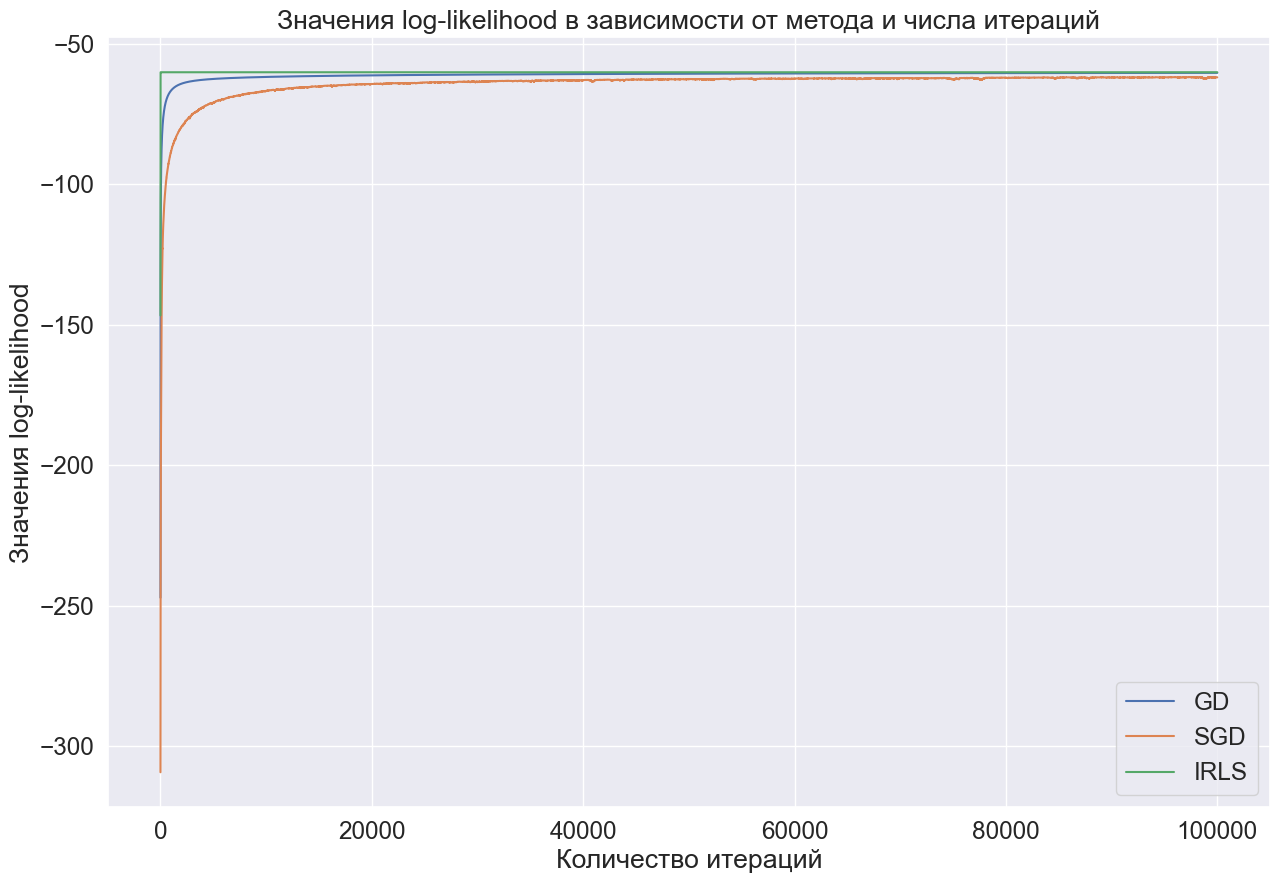

In [440]:
fig = plt.figure(figsize=(15, 10))
plt.plot(np.arange(len(clf_gd.history)), clf_gd.history, label='GD', lw=1.5)
plt.plot(np.arange(len(clf_sgd.history)), clf_sgd.history, label='SGD', lw=1.5)
plt.plot(np.arange(len(clf_irls.history)), clf_irls.history, label='IRLS', lw=1.5)
plt.xlabel('Количество итераций')
plt.ylabel('Значения log-likelihood')
plt.title('Значения log-likelihood в зависимости от метода и числа итераций')
plt.legend();

Как видно из графика быстрее всего сошлись значения функционала при использовании метода IRLS. Затем чуть быстрее сошлись значения у GD, а затем уже и у SGD. Также все графики сходятся примерно кодному и тому же значению функционала. Еще хочется отметить, что при обучении методом IRLS был добавлен регуляризатор $\alpha$, тк без него матрица получалась невырожденной и выходила ошибка при нахождении обратной. Я постарался подобрать наименьший регуляризатор, при котором удавалось посчитать обратную матрицу, чтобы он несильно влиял на обучение.

**3.** Сравните два реализованных критерия остановки по количеству проведенных итераций: 
* евклидова норма разности текущего и нового векторов весов стала меньше, чем $10^{-4}$;
* ограничение на число итераций (например, $10000$). 

Используйте градиентный спуск.

In [441]:
clf_eps = LogisticRegression(method='gd', eps=10e-4, lr=0.001, criterion='eps')
clf_eps.fit(X_train_standard, Y_train)

clf_max_it = LogisticRegression(max_iter=1e4, method='gd', lr=0.001, criterion='max_iter')
clf_max_it.fit(X_train_standard, Y_train)

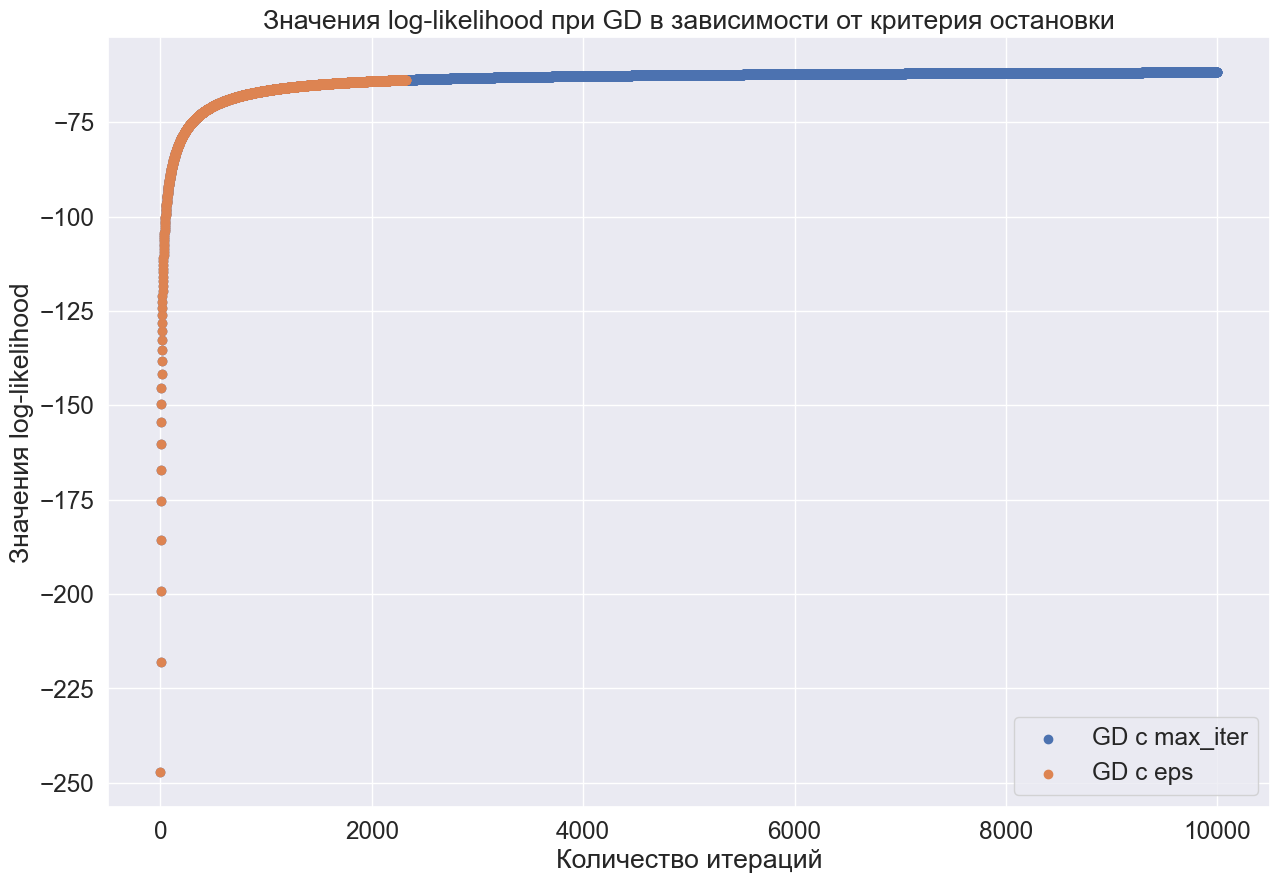

In [442]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(np.arange(len(clf_max_it.history)), clf_max_it.history, label='GD с max_iter', alpha=1)
plt.scatter(np.arange(len(clf_eps.history)), clf_eps.history, label='GD с eps', alpha=1)
plt.xlabel('Количество итераций')
plt.ylabel('Значения log-likelihood')
plt.title('Значения log-likelihood при GD в зависимости от критерия остановки')
plt.legend();

In [443]:
print('Количество итераций с max_iter:', 10000)
print('Количество итераций с eps=10e-4:', clf_eps.n_iter_)

Количество итераций с max_iter: 10000
Количество итераций с eps=10e-4: 2323


Обе модели обучились с одинаковой скоростью сходимости. При этом, для того, чтобы достичь необходимой евклидовой разности текущего и нового вектора весов ($10^{-4}$) было проведено 2323 итераций. Но значения log-likelihood совпадали и при количетсве итераций до 2323.

**4.** Рассмотрите как влияет размер шага (`learning rate`) на качество модели. Обучите каждую модель одинаковое число итераций (например, 10000), а затем посчитайте качество. Воспользуйтесь ограничением на число итераций в качестве критерия остановки, так как для больших `learning rate` у вас может не сойтись модель. Используйте стохастический градиентный спуск. Сделайте выводы.

In [382]:
lrs = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10]

In [451]:
f1_metric = [] # метрика качества
for lr in lrs:
    clf = LogisticRegression(max_iter=1e4, method='sgd', lr=lr, criterion='max_iter')
    clf.fit(X_train_standard, Y_train)
    f1_metric.append(f1_score(Y_test, clf.predict(X_test_standard)))

In [452]:
f1_metric

[0.9403973509933775,
 0.9395973154362417,
 0.9370629370629372,
 0.9014084507042254,
 0.8936170212765958,
 0.8507462686567164,
 0.9054054054054054,
 0.9305555555555556,
 0.9251700680272109,
 0.9315068493150686,
 0.921985815602837,
 0.9166666666666666,
 0.906474820143885]

Как видно, распределение классов не совсем равномерное, поэтому я не стал пользоваться accuracy_score в качестве метрики. Вместо нее я использовал F1 меру.

In [454]:
print('Количество классов 0:', len(Y_test[Y_test == 0]))
print('Количество классов 1:', len(Y_test[Y_test == 1]))

Количество классов 0: 43
Количество классов 1: 71


Видно, что лучшее качество модели получилось при первом значении $lr$, то есть при $lr$ = 1e-5.

Постройте кривые обучения для различных `learning rate`. Не обязательно рассматривать все `learning rate`, так как их слишком много, и график будет нагроможден. Возьмите около половины из них. Какой `learning rate` лучше выбрать? Чем плохи маленькие и большие `learning rate`?

Рассмотрим первые 4 значения learning rate.

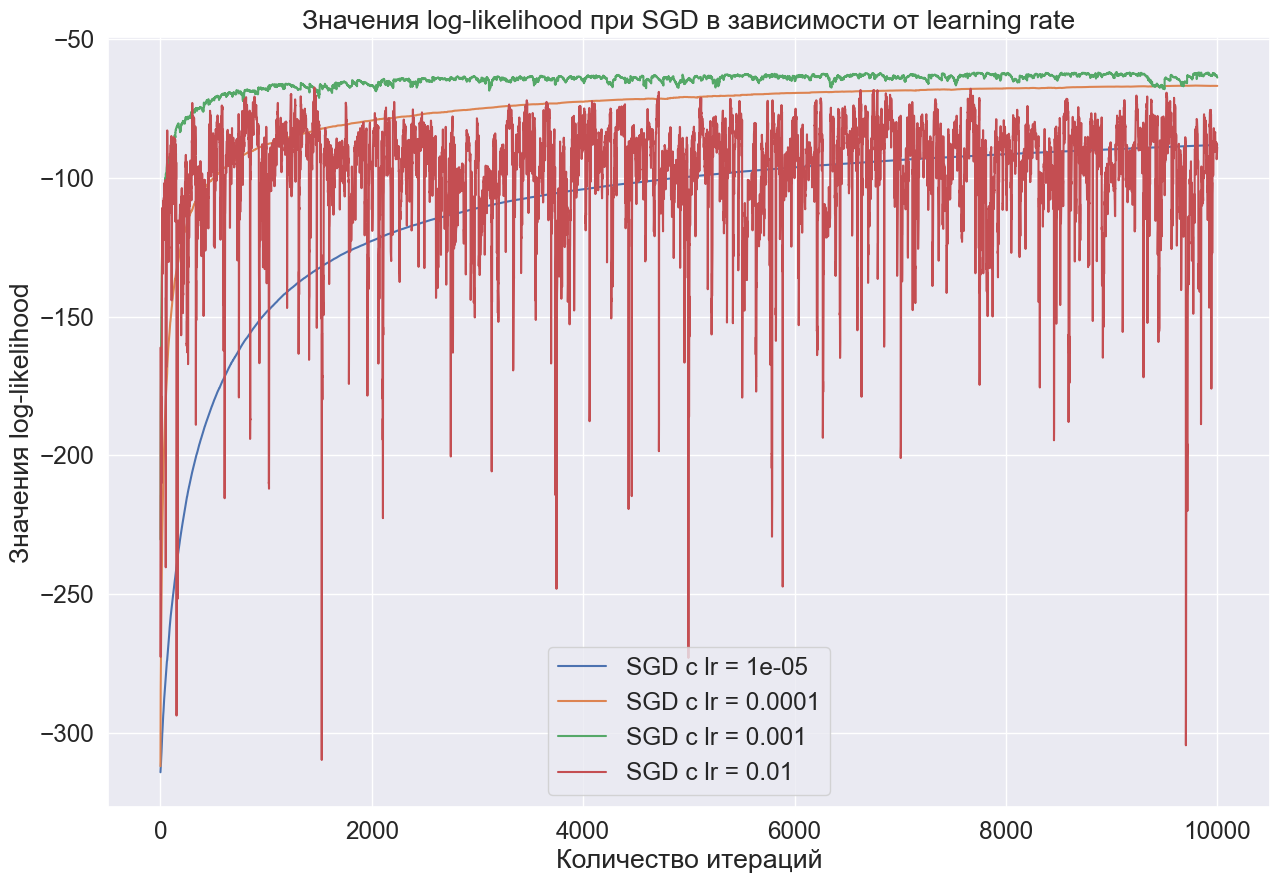

In [412]:
fig = plt.figure(figsize=(15, 10))
for lr in lrs[:4]:
    clf = LogisticRegression(max_iter=1e4, method='sgd', lr=lr, criterion='max_iter')
    clf.fit(X_train_standard, Y_train)
    plt.plot(np.arange(len(clf.history)), clf.history, label='SGD с lr = {}'.format(lr), lw=1.5)
plt.xlabel('Количество итераций')
plt.ylabel('Значения log-likelihood')
plt.title('Значения log-likelihood при SGD в зависимости от learning rate')
plt.legend();

Рассмотрим следующие 4 значения learning rate.

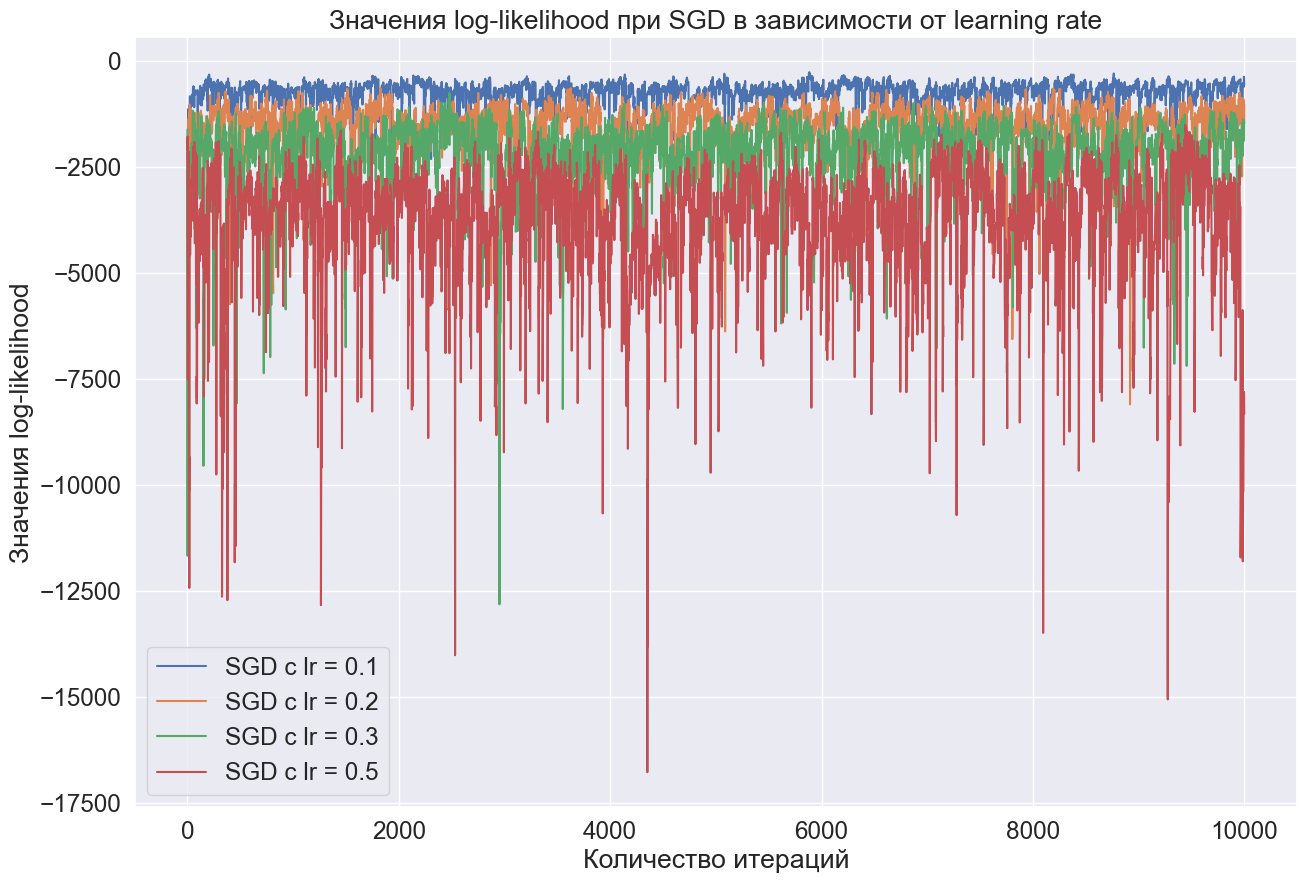

In [394]:
fig = plt.figure(figsize=(15, 10))
for lr in lrs[4:8]:
    clf = LogisticRegression(max_iter=1e4, method='sgd', lr=lr, criterion='max_iter')
    clf.fit(X_train_standard, Y_train)
    plt.plot(np.arange(len(clf.history)), clf.history, label='SGD с lr = {}'.format(lr), lw=1.5)
plt.xlabel('Количество итераций')
plt.ylabel('Значения log-likelihood')
plt.title('Значения log-likelihood при SGD в зависимости от learning rate')
plt.legend();

Из графиков видно, что при $lr$ = 0.1 и больше модель перестает сходиться. То есть такой шаг становится слишком большим для нашей модели (мы каждый раз "перешагиваем" минимум). При меньших значениях $lr$ ($lr$ = 1e-5; 1e-4; 1e-3) модель сходится, причем быстрее всего при наибольшем из этих значений, что и логично, тк модель "шагает" быстрее, но слишклм большими "шагами". Также я думал, что при увеличении max_iter значения, которые раньше не сходились могут начать сходиться, но этого не произошло (я убрал этот график, тк он получался слишком плохим и особо никакой информации не нес). То есть, отвечая на вопрос выше, маленькие learning rate могу быть плохи тем, что долго сходятся, а большие - тем, что вообще не сходятся.

**5.** Рассмотрите несколько моделей, полученные при помощи GD, в которых установите не менее 5-ти различных коэффициентов регуляризации, а также модель без регуляризатора. Сравните, влияет ли наличие регуляризации на скорость сходимости и качество, сделайте выводы. Под качеством подразумевается значение какой-либо выбранной вами метрики качества классификации.

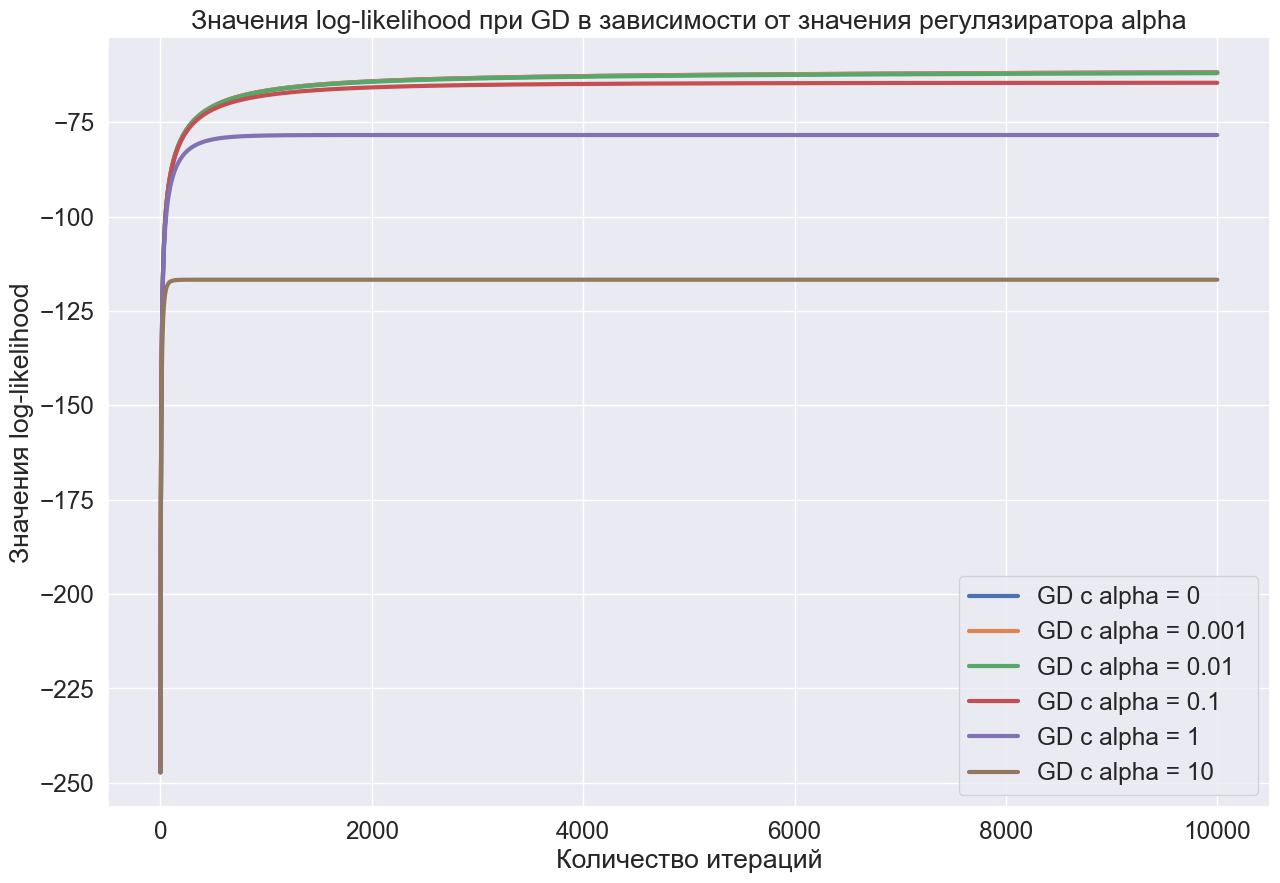

In [455]:
alphas = [0, 1e-3, 1e-2, 0.1, 1, 10]
f1_metric = []

fig = plt.figure(figsize=(15, 10))
for alpha in alphas:
    clf = LogisticRegression(max_iter=1e4, method='gd', alpha=alpha, lr=0.001, criterion='max_iter')
    clf.fit(X_train_standard, Y_train)
    f1_metric.append(f1_score(Y_test, clf.predict(X_test_standard)))
    plt.plot(np.arange(len(clf.history)), clf.history, label='GD с alpha = {}'.format(alpha), lw=3)
plt.xlabel('Количество итераций')
plt.ylabel('Значения log-likelihood')
plt.title('Значения log-likelihood при GD в зависимости от значения регулязиратора alpha')
plt.legend();

Из графика видно, что чем больше коэффициент регуляризации, тем быстрее сходятся значения log-likelihood.

In [456]:
f1_metric

[0.9379310344827587,
 0.9379310344827587,
 0.9452054794520549,
 0.9459459459459459,
 0.9403973509933775,
 0.9281045751633987]

In [457]:
np.argmax(f1_metric)

3

Лучшее значение качетсва метрики достигается при 3 индексе в массиве $\alpha$, то есть при $\alpha = 0.1$

**6.** Возьмите лучшую модель с предыдущего шага. В исходной выборке оставьте только два произвольных признака и обучите на них модель без использования свободного параметра. Визуализируйте предсказания вероятностей класса $1$ для модели.

In [492]:
clf = LogisticRegression(max_iter=1e4, method='gd', alpha=0.1, lr=0.001, criterion='max_iter', fit_intercept=False)
clf.fit(X_train_standard[:, 1:3], Y_train)

In [495]:
x0_grid, x1_grid = np.meshgrid(np.linspace(-10, 10, 2001), 
                               np.linspace(-10, 10, 2001))
ravel_grid = np.array([x0_grid, x1_grid]).reshape((2, 2001*2001)).T
prob_grid = clf.predict_proba(ravel_grid)
prob_grid = prob_grid[:, 0].reshape((2001, 2001))

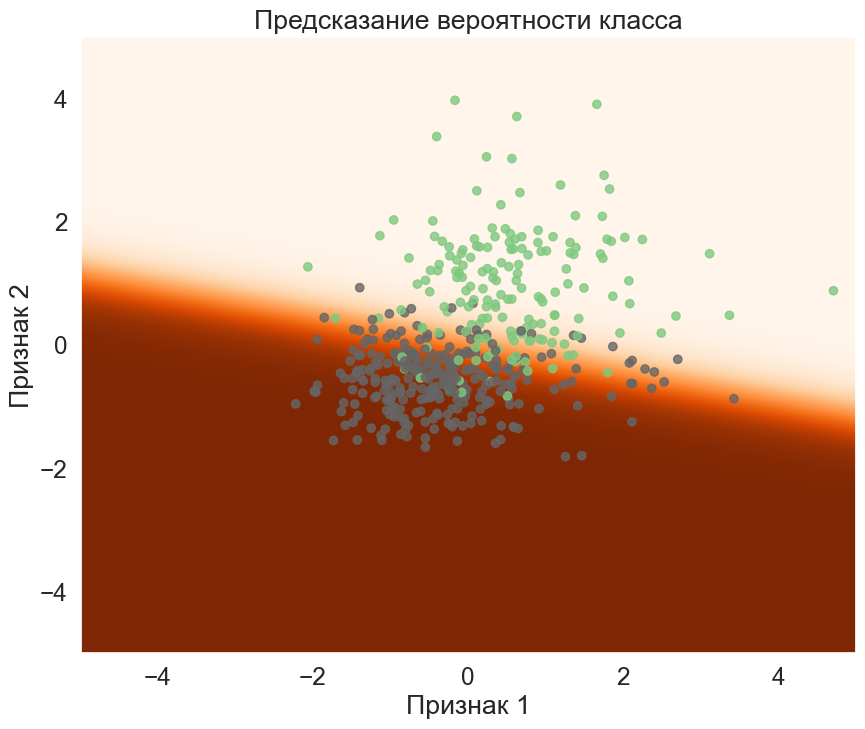

In [504]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(x0_grid, x1_grid, prob_grid, cmap='Oranges')
plt.scatter(X_train_standard[:, 1], X_train_standard[:, 2], c=Y_train, alpha=0.8, cmap='Accent')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel('Признак 1'), plt.ylabel('Признак 2')
plt.title('Предсказание вероятности класса');

**Вывод:** В задаче был написан класс логистической регрессии с тремя разными методами нахождения минимума функционала. Также увидели, что метод IRLS показал себя лучше всего сточки зрения скорости сходимости функционала. Еще увидели, что при при больших значениях learning rate mini batch SGD метод не сходится, а при очень маленьких сходится долго, но потом посчитали, что все таки лучшее значение метрики качества (F1 мера) было получено при очень маленьком $lr$, а именно $lr$ = 1e-5. Также заметили, что в GD методе чем больше коэффициент регуляризации, тем быстрее сходится функционал и нашли коэффициент регуляризации, при котором достигается лучшее значение метрики качества. И в конце обучили модель с соответствующим значением $\alpha$ и визуализировали предсказание вероятности класса по первым двум признакам. Все полученные метрики качетсва были достаточно хорошими (больше 90%).

## Задача 4

Обобщите метод IRLS на случай многоклассовой классификации, используя стратегию с softmax-функцией

## Задача 5.

В этой задаче вам предлагается расмотреть и сравнить две стратегии поиска оптимальных значений некоторого функционала: GridSearch и RandomSearch. В реальной жизни значение функционала &mdash; это значение целевой метрики качества, а оптимизация идет по гиперпараметрам некоторой модели машинного обучения. Коротко напомним, в чем же заключается каждая стратегия.

* GridSearch &mdash; полный перебор по сетке. Суть перебора по сетке заключается в следующем: вы задаете область значений гиперпараметров, которые хотите оптимизировать, обучаете все модели, которые возможно получить в рамках заданного пространства поиска гиперпараметров. Затем выбираете из данных моделей ту, которая дала наилучшее качество на кросс-валидации.
* RandomSearch &mdash; это стратегия, при которой рассматривается некоторая выборка из множества значений гиперпараметров. По умолчанию часто используется равномерное распределение. Лучшая модель выбирается так же на основе кросс-валидации.

Разберем сначала **одномерный случай**. Для этого рассмотрим следующую функцию.

In [ ]:
def f(x):
    return 5.2 - 5/(1+(3*(x))**2) - np.cos(x)/5

Поcтройте график функции $f(x)$ на отрезке $[-20, 20]$. В чем его особенность?

In [ ]:
<...>

Подумайте, какие проблемы могут возникнуть при поиске минимума этой функции, если используется поиск по сетке?

**Ответ:**  <...>

Рассмотрим **поиск по сетке** и проведем вычислительный эксперимент. Для этого будем генерировать случайное смещение из $U[-0.5, 0.5]$, а затем рассматривать смещенную на $x_0$ сетку размера $n$ на отрезке $[-10, 10]$, после чего поиском по сетке искать оптимальное значение $f$.

In [ ]:
# рассматриваемые размеры сеток
grid_size = np.arange(2, 1000)
n_experiments = 100  # количество экспериментов

In [ ]:
# массив для минимумов по сетке для текущего эксперимента
grid_min_f_trace = []

for _ in tqdm(range(n_experiments)):
    # случайное смещение сетки на [-0.5, 0.5]
    x_0 = <...>
    # массив для минимумов для текущего размера сетки
    grid_f_min = []
    # цикл по размеру сетки
    for n in grid_size:
        # сетка на [-10, 10] размера n
        grid = <...>
        # найденный по сетке со смещением x_0 минимум функции f
        f_min = <...>
        # сохраним минимум для сетки размера n
        grid_f_min.append(f_min)
    # сохраним минимумы текущего эксперимента
    grid_min_f_trace.append(grid_f_min)

Для нескольких экспериментов постройте графики значений минимума от количества точек в сетке. 
Для большей наглядности и информативности сразу **зафиксируйте диапазон значений по оси y**, а также отображайте графики в **логарифмическом масштабе**.

In [ ]:
<...>

Теперь рассмотрим **случайный поиск**. Снова проведем вычислительный эксперимент. Обратите внимание, что случайные точки для эксперимента мы генерируем один раз.

In [ ]:
# рассматриваемое количество случайных точек
random_size = np.arange(2, 1000)

In [ ]:
# массив для минимумов для текущего эксперимента
random_min_f_trace = []

# цикл по экспериментам
for _ in tqdm(range(n_experiments)):
    # случайное смещение на [-0.5, 0.5]
    x_0 = <...>
    # массив для минимумов для текущего количества точек
    random_min_f = []
    # сгенерируем случайные на [-10, 10] точки сразу
    points = <...>
    
    #цикл по количеству точек
    for n in random_size:
        # найденный по первым n случайным точкам со смещением x_0 минимум функции f
        f_min = <...>
        # сохранение результатов
        random_min_f.append(f_min)
        
    random_min_f_trace.append(random_min_f)

Снова для нескольких экспериментов постройте графики значений минимума от количества точек при случайном поиске.

In [ ]:
<...>

Сравним два метода. Для этого постройте график зависимости найденного минимума от количества точек (случайных или в сетке). Перед этим предварительно усредните результат по количеству экспериментов. Какие результаты у вас получились?

In [ ]:
<...>

Теперь расмотрим **двумерный случай**, для этого определим следующую функцию:

In [ ]:
def f(x, y,):
    return 5.4 - 5/(1+(3*x)**2) - np.cos(x)/5 - np.cos(y)/5

Постройте тепловую карту значений этой функции на $[-20, 20]^2$.

In [ ]:
<...>

Проведите эксперимент, аналогичный одномерному случаю. В случае поиска по сетке рассмотрите сетку размера $n$ на $[-10, 10]$ по каждой координате. Таким образом, общий размер сетки будет $n^2$. Для ускорения вычислений в случае случайного поиска будет достаточно рассмотреть только такое количество точек, которое соответствует рассмотренным размерам сетки (т.е. квадраты чисел).

Сравните результат с полученным ранее. Сделайте вывод.

In [ ]:
<...>

**Вывод:** <...>